In [6]:
# this is just a translation of the otoro blog into pytorch
# http://blog.otoro.net/2015/11/24/mixture-density-networks-with-tensorflow/

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import math
from tqdm import tnrange, tqdm_notebook

In [2]:
NHIDDEN = 24
STDEV = 0.5
KMIX = 24 # number of mixtures
NOUT = KMIX * 3 # pi, mu, stdev

NSAMPLE = 2400

In [3]:
y_data = np.float32(np.random.uniform(-10.5, 10.5, (1, NSAMPLE))).T
r_data = np.float32(np.random.normal(size=(NSAMPLE,1))) # random noise
x_data = np.float32(np.sin(0.75*y_data)*7.0+y_data*0.5+r_data*1.0)

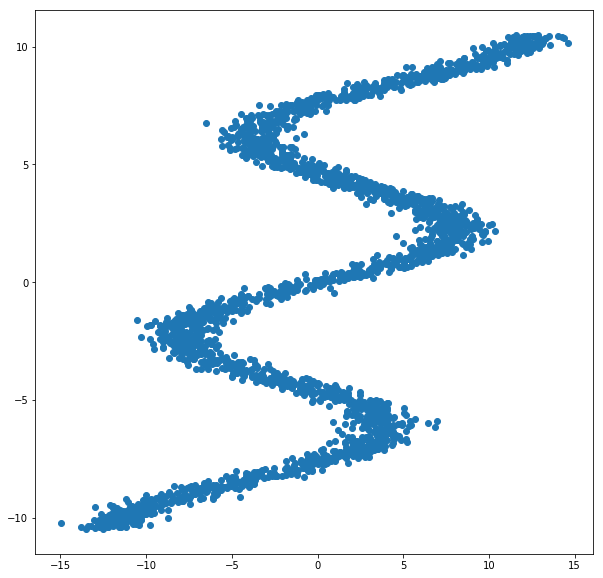

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(x_data, y_data)
plt.show()

In [8]:
class net(nn.Module):
    def __init__(self, input_size, hidden_size, num_distros):
        super(net, self).__init__()
        self.fc1 = nn.Tanh(nn.Linear(input_size, hidden_size))
        self.fc2 = nn.Linear(hidden_size, num_distros)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
        return out

In [10]:
def get_mixture_coef(output):
    out_pi, out_sigma, out_mu = np.split(output, 3)
    return out_pi, out_sigma, out_mu

In [12]:
out_pi, out_sigma, out_mu = get_mixture_coef()

TypeError: get_mixture_coef() missing 1 required positional argument: 'output'

In [ ]:
def get_lossfunc()